In [174]:
import struct
import matplotlib.pyplot as plt
def makeplotdata(data,filexsize,fileysize):
    numberofElements = filexsize * fileysize
    #data = struct.unpack('i'*numberofElements,data)
    x = []
    y = []
    c = []
    for yy in range(fileysize):
        for xx in range(filexsize):
            x.append(xx)
            y.append(yy)
            print 
            c.append(data[xx+filexsize*yy])
    return (x,y,c)


In [175]:
def makeplotboxdata(xstart,ystart,xsize,ysize):
    
    #Bottom Line
    x=list(range(xstart,xstart+xsize))
    y=[ystart]*xsize
    
    # Top Line
    x+=list(range(xstart,xstart+xsize))
    y+=[ystart+ysize]*xsize
    
    #Left Line
    x+=[xstart]*ysize
    y+=list(range(ystart,ystart+ysize))
    
    #Right Line
    x+=[xstart+xsize]*ysize
    y+=list(range(ystart,ystart+ysize))
    
    return(x,y)


In [176]:
import struct
import matplotlib.pyplot as plt
def readfile(filename):
    """ Read a Datafile. It is assumed that the data file be reach by Juypter. 
    Files are assumed to be 2D integer files with the size in the file name with underscores """
    f = open(filename,"rb")
    (basename,filexsize,fileysize) = str.split(filename,"_")
    filexsize = int(filexsize)
    fileysize= int(fileysize)
    data = f.read()
    return data     


In [221]:
import urllib.request
import struct
def request_sds_data(filename,x1,y1,x2,y2,outxsize,outysize,transform):


    with urllib.request.urlopen('http://192.168.1.229:5055/sds?filename=%s&x1=%i&y1=%i&x2=%i&y2=%i&outxsize=%i&outysize=%i&transform=%s' 
                                %(filename,x1,y1,x2,y2,outxsize,outysize,transform)) as response:
       data = response.read()
    #intdata=struct.unpack('i'*(xsize*ysize),data) 
    #intdata=struct.unpack('i',data)                        
    #print(intdata)
    return data

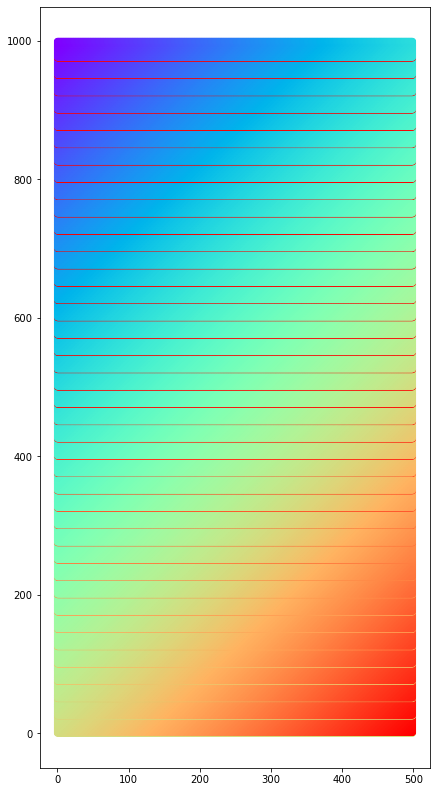

In [286]:
filename = "mydata_500_1000"
datasizex = 500
datasizey = 1000
figurexsize = 7.0
data = readfile(filename)

figureysize = figurexsize/datasizex*datasizey
x1,y1,c1 = makeplotdata(data,datasizex,datasizey)

plt.figure(figsize=(figurexsize,figureysize))

plt.scatter(x1,y1,c=c1,cmap='rainbow',vmin=-datasizey,vmax=datasizex)
plt.show()

#x,y = makeplotboxdata(startx,starty,requestxsize,requestysize)  
#plt.scatter(x,y,c='#000000')

In [287]:
import datetime

def plotsubsection(requestxsize,requestysize,startx,starty,outxsize,outysize,transform):
    outfigurexsize=figurexsize/datasizex*requestxsize
    outfigureysize=figurexsize/datasizex*requestysize

    plt.figure(figsize=(outfigurexsize,outfigureysize))
    print("5. " ,datetime.datetime.now())
    data= request_sds_data(filename,startx,starty,startx+requestxsize,starty+requestysize,outxsize,outysize,transform)
    print("6. " ,datetime.datetime.now())
    x,y,c =makeplotdata(data,outxsize,outysize)
    plt.scatter(x,y,c=c,cmap='rainbow',vmin=-datasizey,vmax=datasizex)
    plt.show()


5.  2020-01-14 18:44:08.543461
6.  2020-01-14 18:44:08.978843


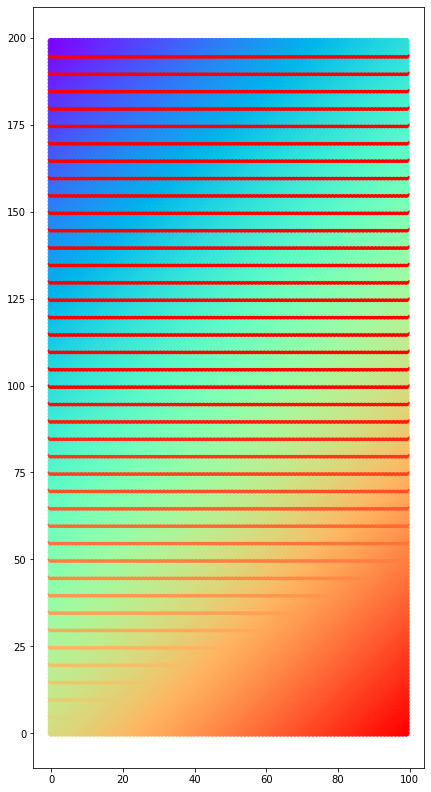

In [290]:
requestxsize = 500
requestysize = 1000
startx = 0
starty = 0
outxsize = 100
outysize = 200
transform = "max"

plotsubsection(requestxsize,requestysize,startx,starty,outxsize,outysize,transform)


In [ ]:
requestxsize = 500
requestysize = 1000
startx = 0
starty = 0
outxsize = 100
outysize = 200
transform = "mean"

plotsubsection(requestxsize,requestysize,startx,starty,outxsize,outysize,transform)


5.  2020-01-14 18:42:54.432860
6.  2020-01-14 18:42:54.791429


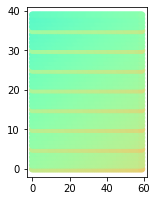

In [288]:
requestxsize = 154
requestysize = 223
startx = 234
starty = 397
outxsize = 60
outysize = 40
transform = "mean"

plotsubsection(requestxsize,requestysize,startx,starty,outxsize,outysize,transform)


In [240]:
data = readfile("mydata_100_200")
x200,y200,c200 = makeplotdata(data,100,200)


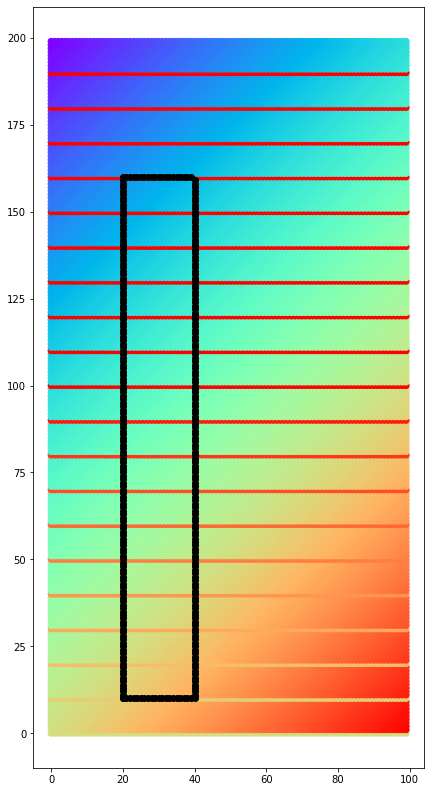

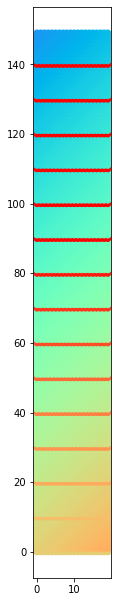

In [230]:
plt.figure(figsize=(7,14))
plt.scatter(x200,y200,c=c200,cmap='rainbow',vmin=-200,vmax=100)

requestxsize = 20
requestysize = 150
startx = 20
starty = 10


x,y = makeplotboxdata(startx,starty,requestxsize,requestysize)  
plt.scatter(x,y,c='#000000')
plt.show()
plt.figure(figsize=(7*(requestxsize/100.),7*(requestysize/100.)))
data= request_sds_data("mydata_100_200",startx,starty,startx+requestxsize,starty+requestysize,outxsize,outysize,transform)
x,y,c =makeplotdata(data,requestxsize,requestysize)
plt.scatter(x,y,c=c,cmap='rainbow',vmin=-200,vmax=100)
plt.show()